# Homework 3
## Statistical & Machine Learning Approaches for Marketing
### Juliana Sanchez Ramirez

### Exercise 3 (p.198, Chap.5)


We now review k-fold cross-validation.

(a) Explain how k-fold cross-validation is implemented.
#### Answer: 
Consists in dividing the dataset into K number of folds. Each fold is treated as validation set sequentially and the rest of the data is used to train. The final MSE is the average of the k MSE's calculated in each iteration.

(b) What are the advantages and disadvantages of k-fold cross-validation relative to:
i. The validation set approach: The validation set approach can lead to overestimates of the test error rate
ii. LOOCV: LOOCV is a particular case of k-fold CV where k = n. For this reason the Leave one out crossvalidation requires more computational power which can be a problem when n is extremely large.



### Excercise 8 (p.200, Chap.5)


We will now perform cross-validation on a simulated data set.

(a) Generate a simulated data set as follows:

> set.seed(1)
> x=rnorm(100)
> y=x-2*x^2+rnorm (100)

In this data set, what is n and what is p? Write out the model used to generate the data in equation form.


In [1]:
set.seed(1)
x=rnorm(100)
y=x-2*x^2+rnorm (100)

#### Equation:  
Y = x-2x^2 + error

n = 100
p=2

(b) Create a scatterplot of X against Y . Comment on what you find.

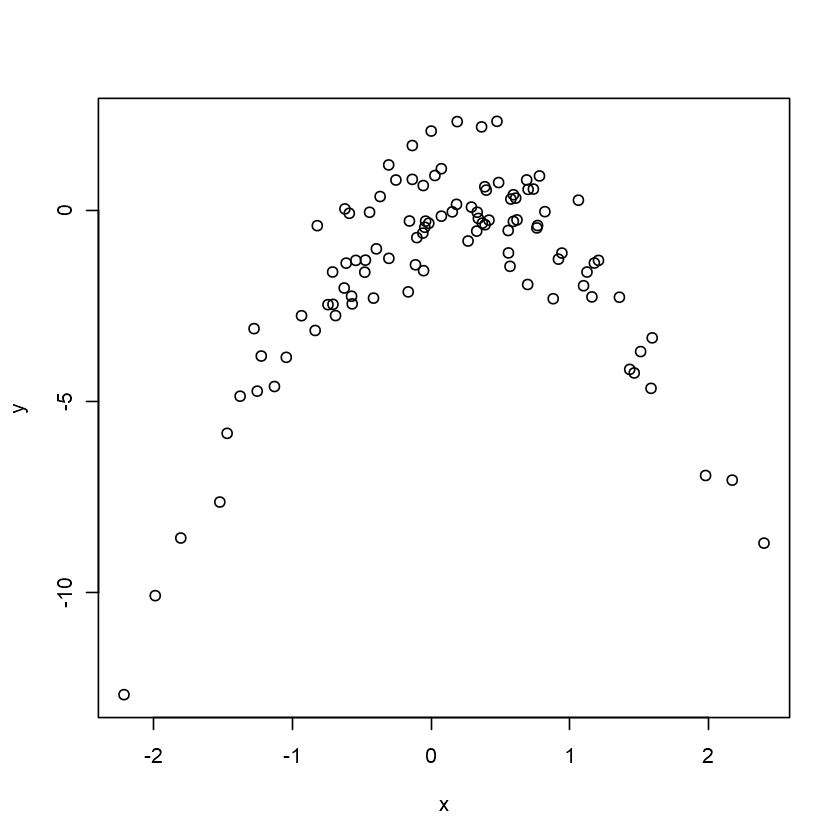

In [2]:
plot(x,y)

We can observe the nonlinear relation betweeen the variables x and y. This fact is due to the polynomial equation with 2 degrees presented previously.

(c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares 

i.. Y = β0 + β1X + ǫ 

ii. Y = β0 + β1X + β2X2 + ǫ 

iii. Y = β0 + β1X + β2X2 + β3X3 + ǫ 

iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ǫ.

In [5]:
library(boot)

Warning message:
"package 'boot' was built under R version 3.6.3"

In [6]:
set.seed(123)
Data <- data.frame(x, y)
fit_1 <- glm(y ~ x)
cv.glm(Data, fit_1)$delta[1]

[1] 7.288162

In [7]:
fit_2 <- glm(y ~ poly(x, 2))
cv.glm(Data, fit_2)$delta[1]

[1] 0.9374236

In [8]:
fit_3 <- glm(y ~ poly(x, 3))
cv.glm(Data, fit_3)$delta[1]

[1] 0.9566218

In [9]:
fit_4 <- glm(y ~ poly(x, 4))
cv.glm(Data, fit_4)$delta[1]

[1] 0.9539049

(d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?


In [10]:
set.seed(3214)
fit_1_d <- glm(y ~ x)
cv.glm(Data, fit_1_d)$delta[1]

[1] 7.288162

In [11]:
fit_2_d <- glm(y ~ poly(x,2))
cv.glm(Data, fit_2_d)$delta[1]

[1] 0.9374236

In [12]:
fit_3_d <- glm(y ~ poly(x,3))
cv.glm(Data, fit_3_d)$delta[1]

[1] 0.9566218

In [13]:
fit_4_d <- glm(y ~ poly(x,4))
cv.glm(Data, fit_4_d)$delta[1]

[1] 0.9539049

The results are the same due to the fact that the crossvalidation is applied

(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.


The second model has the smallest error because it fits a polynomial regression of 2 degrees. This is expected because the simulation of te variable y used the same polynomial equation plus a random error


(f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

Yes, the results agree with the previous conclusion. The coefficients of degree 2 and 4 are not significant

In [14]:
summary(fit_1)


Call:
glm(formula = y ~ x)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.5161  -0.6800   0.6812   1.5491   3.8183  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.6254     0.2619  -6.205 1.31e-08 ***
x             0.6925     0.2909   2.380   0.0192 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 6.760719)

    Null deviance: 700.85  on 99  degrees of freedom
Residual deviance: 662.55  on 98  degrees of freedom
AIC: 478.88

Number of Fisher Scoring iterations: 2


In [15]:
summary(fit_2)


Call:
glm(formula = y ~ poly(x, 2))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9650  -0.6254  -0.1288   0.5803   2.2700  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.5500     0.0958  -16.18  < 2e-16 ***
poly(x, 2)1   6.1888     0.9580    6.46 4.18e-09 ***
poly(x, 2)2 -23.9483     0.9580  -25.00  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9178258)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  89.029  on 97  degrees of freedom
AIC: 280.17

Number of Fisher Scoring iterations: 2


In [16]:
summary(fit_3)


Call:
glm(formula = y ~ poly(x, 3))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9765  -0.6302  -0.1227   0.5545   2.2843  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09626 -16.102  < 2e-16 ***
poly(x, 3)1   6.18883    0.96263   6.429 4.97e-09 ***
poly(x, 3)2 -23.94830    0.96263 -24.878  < 2e-16 ***
poly(x, 3)3   0.26411    0.96263   0.274    0.784    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9266599)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  88.959  on 96  degrees of freedom
AIC: 282.09

Number of Fisher Scoring iterations: 2


In [17]:
summary(fit_4)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


### Excercise 1 (p.259, Chap.6)


1.We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain p + 1 models, containing 0, 1, 2,...,p predictors. Explain your answers:

(a) Which of the three models with k predictors has the smallest training RSS?
 
THE ONE WITH THE BEST SUBSET SELECTION

(b) Which of the three models with k predictors has the smallest test RSS?

(c) True or False:

i. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable
model identified by forward stepwise selection. TRUE

ii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)-
variable model identified by backward stepwise selection. TRUE

iii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)-
variable model identified by forward stepwise selection. FALSE

iv. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable
model identified by backward stepwise selection. FALSE

v. The predictors in the k-variable model identified by best subset are a subset of the predictors in the (k + 1)-variable
model identified by best subset selection. FALSE

### Excercise 9 (p.263, Chap.6) 


9. In this exercise, we will predict the number of applications received using the other variables in the College data set.

(a) Split the data set into a training set and a test set.


In [29]:
install.packages("mltools")

package 'mltools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jsanchezramirez\AppData\Local\Temp\Rtmp2VmJmb\downloaded_packages


In [32]:
library(ISLR)
#library(tidyverse)
library(mltools)
library(data.table)
data('College')
set.seed(1)
# Train test separate with stratified
set.seed(123)


Warning message:
"package 'data.table' was built under R version 3.6.3"

In [71]:
sample <- sample.int(n = nrow(College), size = floor(.7*nrow(College)), replace = F)
train <- College[sample, ]
test  <- College[-sample, ]

train_dumm <- one_hot(as.data.table(train))
test_dumm <- one_hot(as.data.table(test))
#x_train_dumm <-train_dumm[,-3]
X_train = model.matrix(Apps ~.,data=train_dumm)[,-1]
y_train_dumm <- train_dumm$Apps

#x_test_dumm <-test_dumm[,-3]
X_test = model.matrix(Apps ~.,data=test_dumm)[,-1]
y_test_dumm <- test_dumm$Apps



(b) Fit a linear model using least squares on the training set, and report the test error obtained.

In [41]:
md_lr <- lm(Apps ~ ., data=train_dumm)
summary(md_lr)


Call:
lm(formula = Apps ~ ., data = train_dumm)

Residuals:
    Min      1Q  Median      3Q     Max 
-3137.6  -456.4   -41.2   268.6  6818.1 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.758e+03  4.680e+02  -3.756 0.000192 ***
Private_No   7.744e+02  1.670e+02   4.637 4.48e-06 ***
Private_Yes         NA         NA      NA       NA    
Accept       1.246e+00  6.018e-02  20.706  < 2e-16 ***
Enroll      -2.613e-01  2.300e-01  -1.136 0.256495    
Top10perc    3.703e+01  6.635e+00   5.580 3.86e-08 ***
Top25perc   -7.498e+00  5.341e+00  -1.404 0.160950    
F.Undergrad  5.776e-02  3.740e-02   1.544 0.123107    
P.Undergrad  6.089e-02  3.558e-02   1.711 0.087600 .  
Outstate    -5.288e-02  2.345e-02  -2.255 0.024570 *  
Room.Board   1.525e-01  5.735e-02   2.659 0.008084 ** 
Books       -1.350e-02  2.634e-01  -0.051 0.959157    
Personal     1.866e-02  7.213e-02   0.259 0.796000    
PhD         -1.191e+01  5.343e+

In [44]:
pred <- predict(md_lr, test_dumm)
mean((test_dumm$Apps - pred) ^ 2)


Warning message in predict.lm(md_lr, test_dumm):
"prediction from a rank-deficient fit may be misleading"

[1] 1546977

(c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [45]:
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"Loaded glmnet 4.1-1


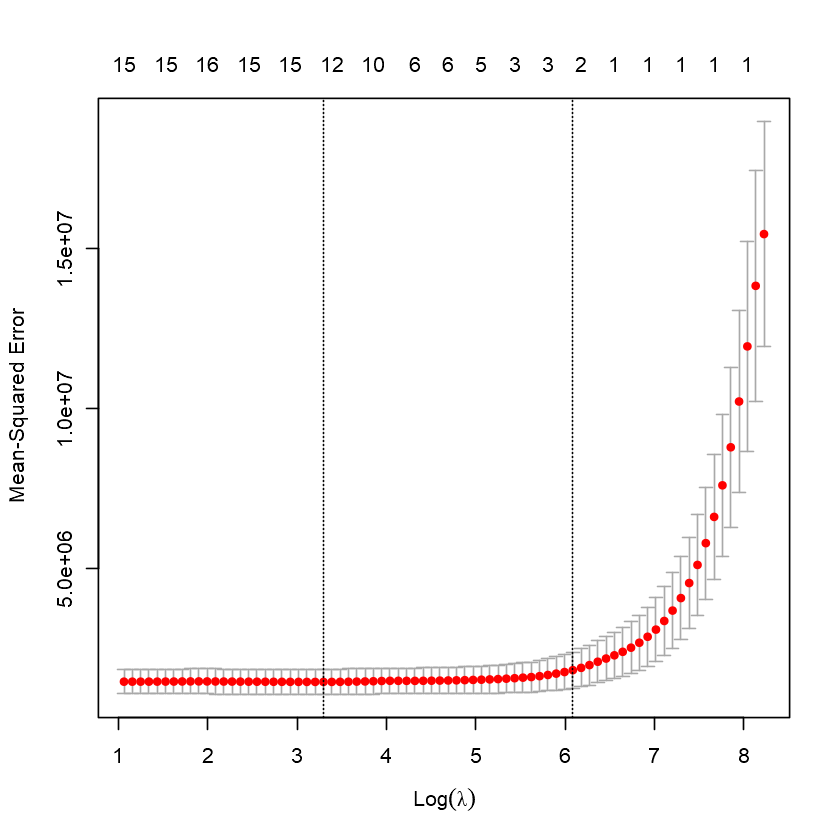

In [72]:
#Using cross-validation to choose the tuning parameter 
set.seed (123)
cv.out= cv.glmnet(X_train, y_train_dumm)
plot(cv.out)

In [73]:
lambda=cv.out$lambda.min
glm_model =glmnet(X_train,y_train_dumm,alpha=0,lambda=lambda)

pred=predict(glm_model,s=lambda ,newx=X_test)
#Calculating Accuracy
MSE=mean((pred-y_test_dumm)^2)
#Printing MSE
print(MSE)

[1] 1138297


(d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.

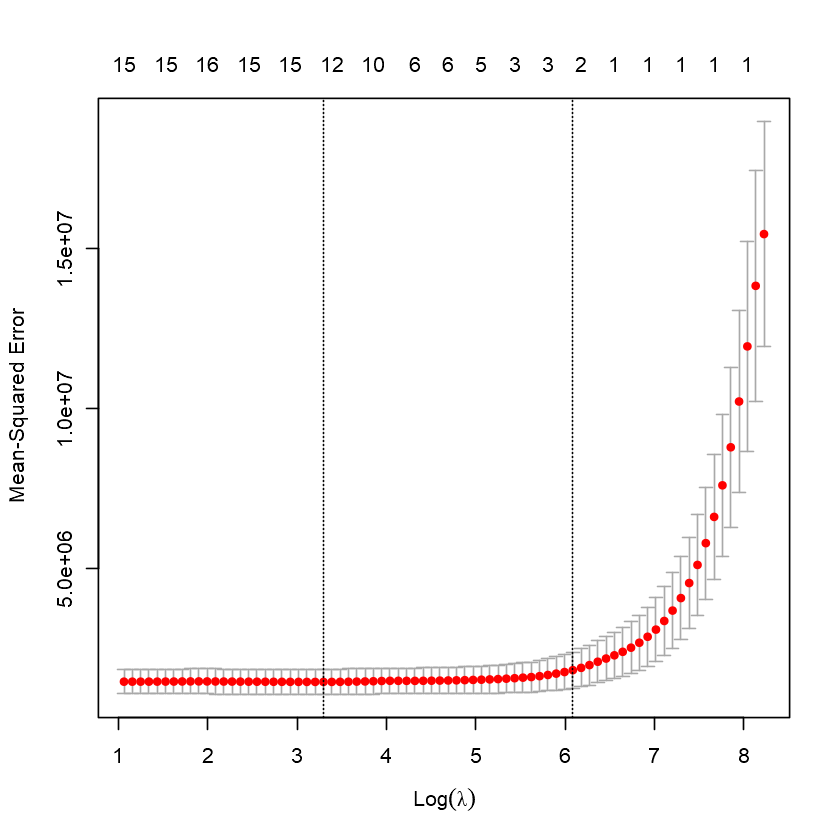

In [74]:
set.seed (123)
cv.out=cv.glmnet (X_train,y_train_dumm,alpha =1)
plot(cv.out)

In [75]:
lambda=cv.out$lambda.min
glm_model_la =glmnet(X_train,y_train_dumm,alpha=1,lambda=lambda)
glm_model_la$beta


18 x 1 sparse Matrix of class "dgCMatrix"
                       s0
Private_No   5.633113e+02
Private_Yes -1.257078e-10
Accept       1.539480e+00
Enroll      -5.086011e-01
Top10perc    2.946867e+01
Top25perc    .           
F.Undergrad  .           
P.Undergrad  .           
Outstate    -4.520583e-02
Room.Board   1.137323e-01
Books        .           
Personal     .           
PhD         -6.123322e+00
Terminal    -4.484364e-01
S.F.Ratio    8.089770e-01
perc.alumni -9.820528e-01
Expend       5.774751e-02
Grad.Rate    3.255455e+00

In [76]:
pred_la=predict(glm_model_la,s=lambda ,newx=X_test)
#Calculating Accuracy
MSE=mean((pred_la-y_test_dumm)^2)
#Printing MSE
print(MSE)

[1] 1136074


In [78]:
lasscoef=predict(glm_model_la,type="coefficients",s=lambda)[1:length(glm_model_la$beta),]
lasscoef

(Intercept)    Private_No   Private_Yes        Accept        Enroll 
-1.018151e+03  5.633113e+02 -1.257078e-10  1.539480e+00 -5.086011e-01 
    Top10perc     Top25perc   F.Undergrad   P.Undergrad      Outstate 
 2.946867e+01  0.000000e+00  0.000000e+00  0.000000e+00 -4.520583e-02 
   Room.Board         Books      Personal           PhD      Terminal 
 1.137323e-01  0.000000e+00  0.000000e+00 -6.123322e+00 -4.484364e-01 
    S.F.Ratio   perc.alumni        Expend 
 8.089770e-01 -9.820528e-01  5.774751e-02

(e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value
of M selected by cross-validation.

In [80]:
library(pls)


Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



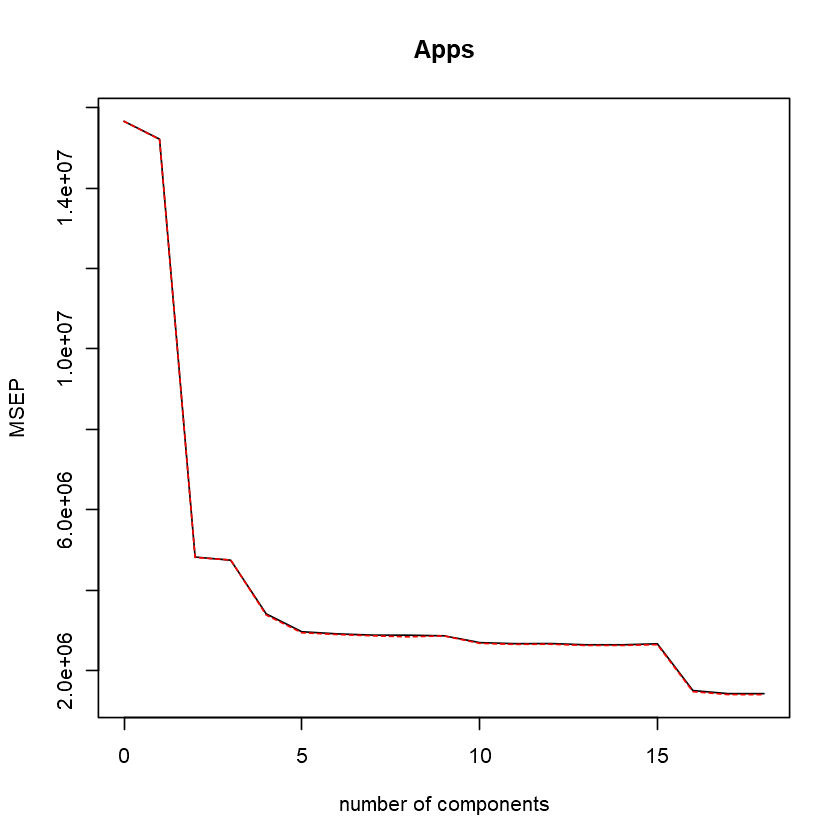

In [82]:
pcr_model<-pcr(Apps~.,data = train_dumm, scale = TRUE, validation = "CV")
validationplot(pcr_model, val.type = "MSEP")

(f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value
of M selected by cross-validation.


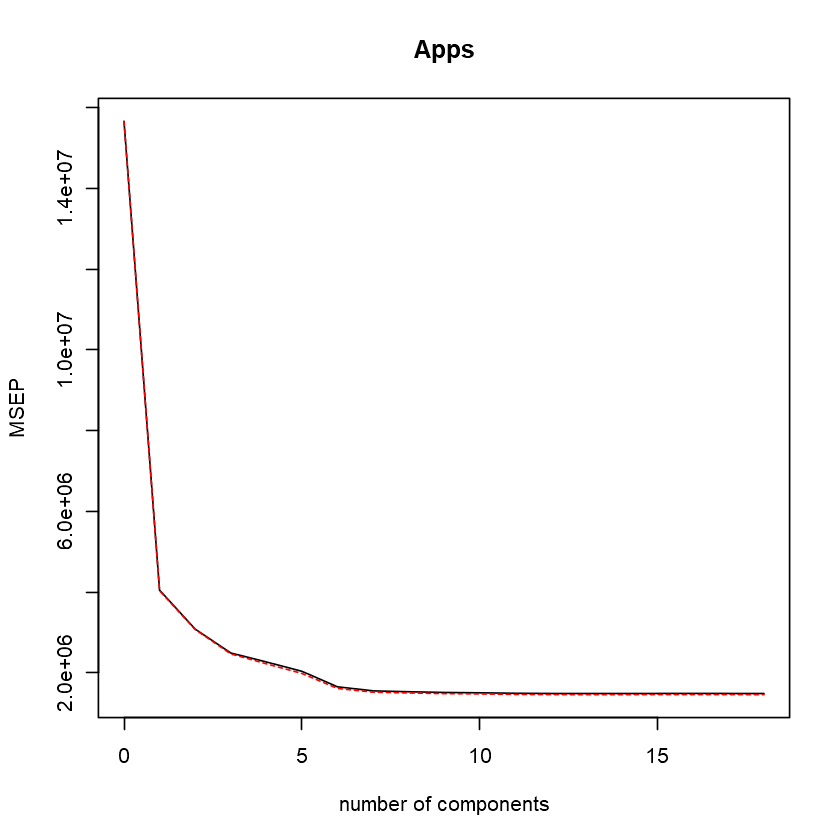

In [84]:
pls_model<-plsr(Apps~.,data = train_dumm, scale = TRUE, validation = "CV")
validationplot(pls_model, val.type = "MSEP")

(g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much
difference among the test errors resulting from these five approaches?


The results of the estimations are accurate to predict the number of applications receive. The error is smaller using a plsr approach